In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

For this lab, **you can choose to work alone of in a group of up to four students**. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one GitHub repo (you can create one on github.ubc.ca and set the visibility to "public").

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2023-24/573_lab4_riyaphabh

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

1. While "reviews_per_month" is a good attribute to see how popular an Airbnb is performing but as a customer I would be more interested in something like a "airbnb rating" or "review score" which summarises the whole experience of the stay and helps the customers select more effectively while booking an Airbnb.

2. There are approximately 49k observations but since we have NANs in certain useful columns. Hence, by dropping the NANs we will be down to ~39k observations.

3. The dataset could have had additional useful feature like whether the Airbnb has parking or not, central heating system there or not etc. which might have helped us   train a more effective regression model.

In [2]:
import pandas as pd

df = pd.read_csv("./data/AB_NYC_2019.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

The dataset is too large, so to run our simulations, fitting and plotting easily, we're reducing the size of the dataset from 38821 to 5000 rows.

In [4]:
df = df.sample(n=5000, random_state=42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 5576 to 15633
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5000 non-null   int64  
 1   name                            5000 non-null   object 
 2   host_id                         5000 non-null   int64  
 3   host_name                       5000 non-null   object 
 4   neighbourhood_group             5000 non-null   object 
 5   neighbourhood                   5000 non-null   object 
 6   latitude                        5000 non-null   float64
 7   longitude                       5000 non-null   float64
 8   room_type                       5000 non-null   object 
 9   price                           5000 non-null   int64  
 10  minimum_nights                  5000 non-null   int64  
 11  number_of_reviews               5000 non-null   int64  
 12  last_review                     500

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=573)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

In [7]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,18024033.98,64441450.84,40.73,-73.95,142.47,5.75,28.88,1.36,5.25,116.17
std,10745423.50,76802448.96,0.05,0.05,150.22,14.30,47.47,1.64,27.20,130.14
min,5099.00,2571.00,40.51,-74.24,10.00,1.00,1.00,0.01,1.00,0.00
25%,8606855.00,7014796.50,40.69,-73.98,68.00,2.00,3.00,0.19,1.00,0.00
50%,18896466.00,27691728.50,40.72,-73.95,105.00,2.00,10.00,0.70,1.00,56.00
75%,27446866.75,99574635.25,40.76,-73.93,175.00,4.00,33.00,2.02,2.00,234.00
max,36413632.00,271901058.00,40.91,-73.72,3900.00,365.00,459.00,14.00,327.00,365.00


In [8]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5576,4053517,Two-Bedroom Greenpoint Apartment,3967335,Molly,Brooklyn,Greenpoint,40.73,-73.95,Entire home/apt,174,2,31,2019-06-02,0.54,2,12
7729,5849991,3 bedroom Apt at $249 per Night.,9898029,Anthony,Brooklyn,East Flatbush,40.65,-73.93,Entire home/apt,249,3,10,2019-06-03,0.65,5,156


In [9]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [10]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [11]:
len(df["neighbourhood"].unique())

174

In [12]:
# get numeric columns in df, drop unnecessary columns and encode columns with categorical values
df_num = df.drop(["id", "name", "host_id", "host_name", "neighbourhood", "last_review"], axis = 1)
encode_room = {'Private room': 1, 'Entire home/apt': 2, 'Shared room': 3}
encode_neigh_grp = {'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Staten Island' : 4, 'Bronx' : 5}
df_num['neighbourhood_group'] = df_num['neighbourhood_group'].replace(encode_neigh_grp)
df_num['room_type'] = df_num['room_type'].replace(encode_room)
df_num

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5576,1,40.73,-73.95,2,174,2,31,0.54,2,12
7729,1,40.65,-73.93,2,249,3,10,0.65,5,156
2020,1,40.68,-73.93,2,107,2,147,1.89,1,27
4195,1,40.68,-73.94,2,130,3,92,1.45,1,248
9758,1,40.69,-73.94,2,102,3,64,1.38,1,296
...,...,...,...,...,...,...,...,...,...,...
16705,3,40.77,-73.91,2,200,2,18,0.49,1,6
35192,3,40.75,-73.94,2,107,3,4,0.38,1,0
39200,1,40.69,-73.96,1,40,15,4,0.56,11,325
17688,2,40.74,-74.00,2,350,3,6,0.17,1,0


In [13]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13057,9885501,Private Bedroom in LES/East Village,1762558,Evan,Manhattan,East Village,40.72,-73.98,Private room,89,2,24,2017-04-28,0.56,1,0
36735,29191564,"GORGEOUS APARTMENT, PERFECT HARLEM LOCATION!",29104701,Patrice,Manhattan,Harlem,40.80,-73.96,Entire home/apt,150,3,16,2019-06-14,2.22,1,50
39659,30879761,Comfortable Suite/Apartment in Manhattan,25573498,Tong,Manhattan,Morningside Heights,40.81,-73.97,Entire home/apt,60,5,4,2019-02-20,0.59,1,0
47236,35648056,High Ceiling 5 BEDS up to 10 people in Times Sq.!,11066012,Mike And Narimá,Manhattan,Hell's Kitchen,40.76,-73.99,Entire home/apt,417,3,1,2019-07-01,1.00,1,219
22047,17737245,Chic & zen room in a very clean Brooklyn apt,43045034,Thuy,Brooklyn,Bedford-Stuyvesant,40.70,-73.94,Private room,70,3,27,2019-06-01,1.81,1,0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 13057 to 41081
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4000 non-null   int64  
 1   name                            4000 non-null   object 
 2   host_id                         4000 non-null   int64  
 3   host_name                       4000 non-null   object 
 4   neighbourhood_group             4000 non-null   object 
 5   neighbourhood                   4000 non-null   object 
 6   latitude                        4000 non-null   float64
 7   longitude                       4000 non-null   float64
 8   room_type                       4000 non-null   object 
 9   price                           4000 non-null   int64  
 10  minimum_nights                  4000 non-null   int64  
 11  number_of_reviews               4000 non-null   int64  
 12  last_review                     40

<Axes: >

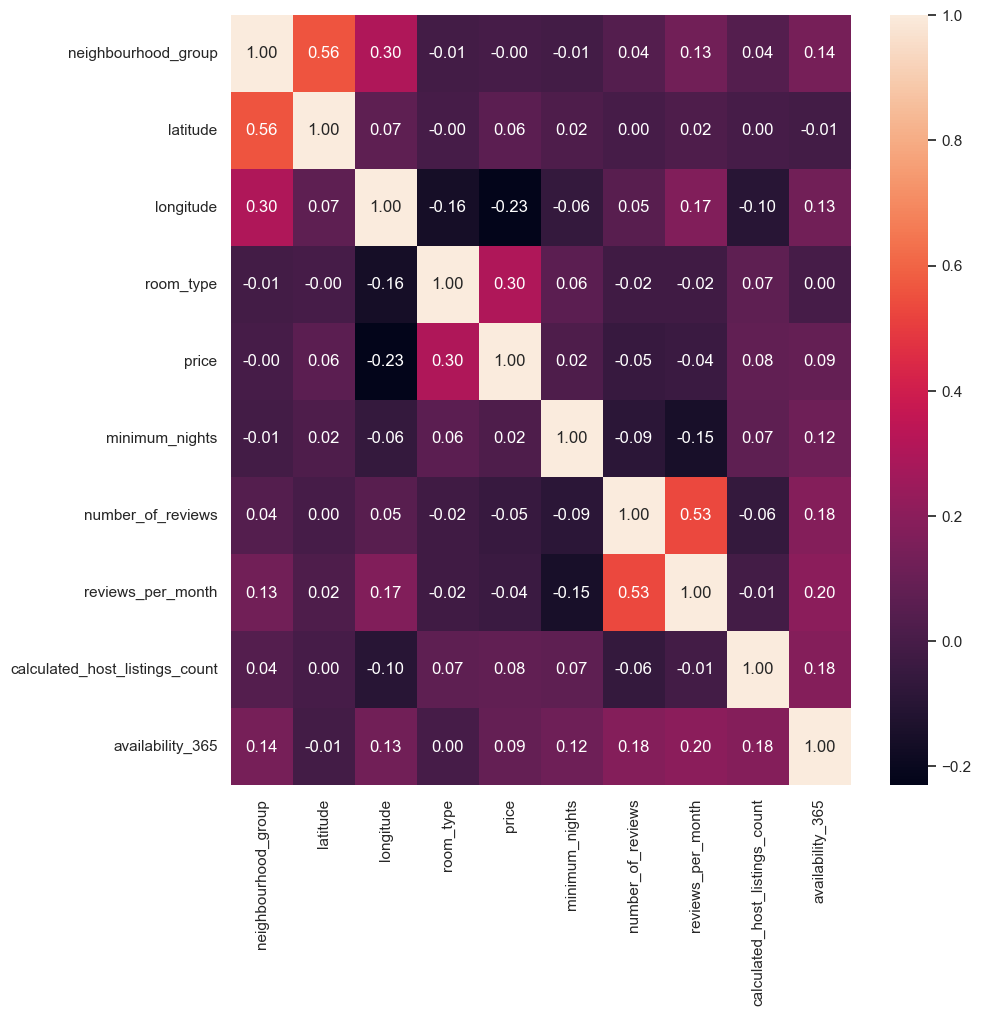

In [15]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
plt.figure(figsize=(10, 10))
sns.heatmap(df_num.corr().round(2), annot=True, fmt=".2f")

The above diagram shows the correlation matrix between numeric and categorical columns. The highest positive correlation is for latitude and neighbourhood_group. Our target (reviews per month) is highly correlated to the number_of reviews. The highest negative correlation is between price and longitude. This is an interesting observation. We see that price is affected by location.

<Axes: title={'center': 'Correlation with Response Variable'}>

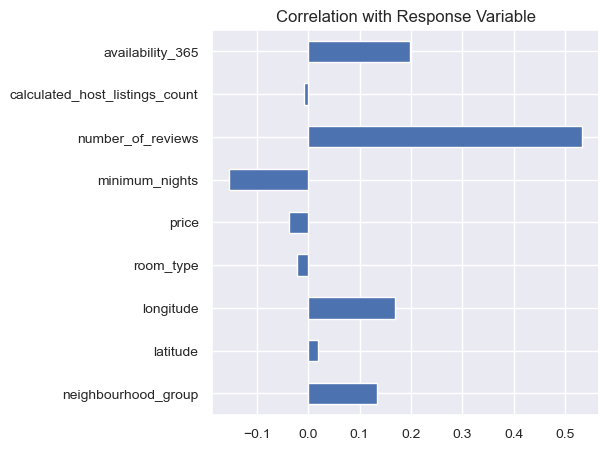

In [16]:
df_num.drop('reviews_per_month', axis=1).corrwith(df_num.reviews_per_month).plot.barh(figsize=(5, 5), 
                                                        title='Correlation with Response Variable',
                                                        fontsize=10, grid=True)

This visualization shows the correlation of each numeric an categorical variable with the target (reviews_per_month). We see that number of reviews has highest positive correlation, minimum nights has the highest magnitude for negative correlation. availability_365 also shows a significant correlation.

In [17]:
import altair as alt
alt.data_transformers.enable('vegafusion')
alt.Chart(train_df).mark_bar().encode(
    x = alt.X("reviews_per_month").bin(maxbins=40),
    y = alt.Y("count()")
)

alt.Chart(...)

The above chart shows the distribution of the target in the train dataframe

In [18]:
alt.Chart(test_df).mark_bar().encode(
    x = alt.X("reviews_per_month").bin(maxbins=40),
    y = alt.Y("count()")
)

alt.Chart(...)

The above chart shows the distribution of the target in the test dataframe

Since this is a regression problem, we will be focusing on R^2 score.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

We are using 3 new features here:
1. "days_since_last_review": Difference in days between the current review and the last review
2. "min_expense": This the minimum expense at an Airbnb calculated using "minimum_nights" and "price" to give an idea of the minimum customer expenditure at that place.
3. "availability_prop": This is calculated using "availability_365" and dividing by 365 as the proportion gives a more intuitive understanding of the Airbnb availability throughout the year.

In [19]:
#explanation above
last_review_day = max(pd.to_datetime(df["last_review"]))

train_df["days_since_last_review"] = (last_review_day - (pd.to_datetime(train_df["last_review"]))).dt.days
test_df["days_since_last_review"] = (last_review_day - (pd.to_datetime(test_df["last_review"]))).dt.days

train_df['min_expense'] = train_df['minimum_nights'] * train_df['price']
test_df['min_expense']  = test_df['minimum_nights'] * test_df['price']

train_df["availability_prop"] = round(train_df["availability_365"]/365, 2)
test_df["availability_prop"] = round(test_df["availability_365"]/365, 2)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [20]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,min_expense,availability_prop
13057,9885501,Private Bedroom in LES/East Village,1762558,Evan,Manhattan,East Village,40.72,-73.98,Private room,89,2,24,2017-04-28,0.56,1,0,801,178,0.00
36735,29191564,"GORGEOUS APARTMENT, PERFECT HARLEM LOCATION!",29104701,Patrice,Manhattan,Harlem,40.80,-73.96,Entire home/apt,150,3,16,2019-06-14,2.22,1,50,24,450,0.14
39659,30879761,Comfortable Suite/Apartment in Manhattan,25573498,Tong,Manhattan,Morningside Heights,40.81,-73.97,Entire home/apt,60,5,4,2019-02-20,0.59,1,0,138,300,0.00
47236,35648056,High Ceiling 5 BEDS up to 10 people in Times Sq.!,11066012,Mike And Narimá,Manhattan,Hell's Kitchen,40.76,-73.99,Entire home/apt,417,3,1,2019-07-01,1.00,1,219,7,1251,0.60
22047,17737245,Chic & zen room in a very clean Brooklyn apt,43045034,Thuy,Brooklyn,Bedford-Stuyvesant,40.70,-73.94,Private room,70,3,27,2019-06-01,1.81,1,0,37,210,0.00


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
 
numerical_feature = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_prop",
                    "days_since_last_review", "min_expense"]
categorical_features = ["neighbourhood_group", "room_type"]
drop_features = ["id", "host_id", "host_name", "last_review", "availability_365", "name"]

preprocessor = make_column_transformer(
    (StandardScaler(), numerical_feature),
    (OneHotEncoder(handle_unknown = 'ignore', sparse_output=False), categorical_features),
    ("drop", drop_features)
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [22]:
X_train = train_df.drop(columns='reviews_per_month')
y_train = train_df['reviews_per_month']
X_test = test_df.drop(columns='reviews_per_month')
y_test = test_df['reviews_per_month']

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import make_scorer, r2_score

cross_val_results = {}
dc = DummyClassifier()
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc, X_train, 
                                                         y_train, 
                                                         return_train_score=True, 
                                                         scoring = make_scorer(r2_score))).agg(['mean', 'std']).round(3).T
cross_val_results['dummy']

,mean,std
fit_time,0.00,0.00
score_time,0.00,0.00
test_score,-0.65,0.08
train_score,-0.65,0.02


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

In [24]:
#Ridge CV
ridge =  make_pipeline(
    preprocessor, RidgeCV()
)

In [25]:
ridge_cv = pd.DataFrame(cross_validate(ridge, X_train, y_train, cv=10, return_train_score=True))
ridge_cv

,fit_time,score_time,test_score,train_score
0,0.06,0.01,0.47,0.40
1,0.03,0.01,0.35,0.41
2,0.02,0.01,0.47,0.40
3,0.04,0.01,0.34,0.42
4,0.05,0.01,0.36,0.41
5,0.10,0.01,0.49,0.40
6,0.03,0.01,0.37,0.41
7,0.03,0.01,0.44,0.41
8,0.04,0.01,0.34,0.42
9,0.03,0.01,0.39,0.41


In [26]:
cross_val_results['ridge'] = ridge_cv.agg(['mean', 'std']).round(3).T
cross_val_results['ridge']

,mean,std
fit_time,0.04,0.02
score_time,0.01,0.00
test_score,0.40,0.06
train_score,0.41,0.01


**Summary:** We are getting an R^2 score of 0.41 here and which is low. We want to train more complex models to capture non-linear relationships and also handle to multicollinearity better.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

We are tring out these 3 models here:
- Support Vector Regression (SVR)
- Random Forest Regression
- KNN for regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


models = {
    "KNN_reg": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVR": SVR(kernel='rbf') 
}

In [28]:
for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    cross_val_results[name] = pd.DataFrame(cross_validate(pipe, X_train, y_train,
                                                          cv=5, 
                                                          return_train_score=True, 
                                                          scoring=make_scorer(r2_score))).agg(['mean', 'std']).round(3).T



In [29]:
pd.concat(cross_val_results, axis = "columns")

dummy      ridge      KNN_reg      RandomForest       SVR     
             mean  std  mean  std    mean  std         mean  std mean  std
fit_time     0.00 0.00  0.04 0.02    0.04 0.00        13.52 0.67 1.27 0.02
score_time   0.00 0.00  0.01 0.00    0.13 0.18         0.06 0.01 0.48 0.01
test_score  -0.65 0.08  0.40 0.06    0.36 0.04         0.58 0.03 0.45 0.04
train_score -0.65 0.02  0.41 0.01    0.59 0.01         0.94 0.00 0.48 0.01

**Summary:** Random Forest Regressor gives the highest R^2 score among KNN, SVR and Random Forest and hence we are using that model in further parts.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward/backward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

In [30]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, alphas=[0.001, 0.01, 0.1, 1, 10], max_iter=100)

pipeline_lasso = make_pipeline(preprocessor, lasso)

cv_lasso = cross_validate(pipeline_lasso, X_train, y_train, scoring = make_scorer(r2_score), cv=5, n_jobs=-1)

cv_lasso = pd.DataFrame(cv_lasso)
cv_lasso.agg(['mean', 'std']).round(3).T

,mean,std
fit_time,0.09,0.02
score_time,0.01,0.00
test_score,0.40,0.02


**Summary:** Our R^2 score dropped by 0.2 using Lasso, hence we are not using this Feature selection for further steps downstream.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.  Briefly summarize your results.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

For the Random Forest Regressor selected above, we are doing Hyperparameter optimization for the hyperparameters:
- n_estimators
- max_depth

In [31]:
from sklearn.model_selection import RandomizedSearchCV

rf_obj = make_pipeline(preprocessor, RandomForestRegressor())

param_grid = {
    'randomforestregressor__n_estimators': [10, 50, 100, 200],
    'randomforestregressor__max_depth': [None, 10, 20, 30]
}

random_search = RandomizedSearchCV(
    estimator=rf_obj,
    param_distributions=param_grid,
    n_iter=10, n_jobs=-1, refit = "r2", return_train_score=True
)

In [32]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'price',
                                                                                'minimum_nights',
                                                                                'number_of_reviews',
                                                                                'calculated_host_listings_count',
                                                                                'availability_prop',
                                                                                'days_since_last_review',
                                                                                'min_expense']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['neighbourhood_group',
                                                                                'room_type']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['id',
                                                                                'host_id',
                                                                                'host_name',
                                                                                'last_review',
                                                                                'availability_365',
                                                                                'name'])])),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20,
                                                                             30],
                                        'randomforestregressor__n_estimators': [10,
                                                                                50,
                                                                                100,
                                                                                200]},
                   refit='r2', return_train_score=True)

In [33]:
random_search.best_params_

{'randomforestregressor__n_estimators': 200,
 'randomforestregressor__max_depth': 20}

In [34]:
random_search.best_score_

0.5809633131150524

**Summary:** Our best R^2 score here is 0.582 which is similar to our Random Forest Regressor's R^2 score of 0.58. Hence, this steps did not significantly improve our model's cross validation score.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

In [35]:
import shap

In [36]:
pipe_RF = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=200, 
                                                            max_depth=20))

pipe_RF.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'price', 'minimum_nights',
                                                   'number_of_reviews',
                                                   'calculated_host_listings_count',
                                                   'availability_prop',
                                                   'days_since_last_review',
                                                   'min_expense']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'host_id', 'host_name',
                                                   'last_review',
                                                   'availability_365',
                                                   'name'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])

In [37]:
categorical_columns = list(pipe_RF.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out(input_features=categorical_features))
categorical_columns

['neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

In [38]:
feature_names = numerical_feature + categorical_columns

In [39]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_prop,days_since_last_review,min_expense,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
16415,-0.79,-0.93,0.73,-0.19,-0.35,-0.16,-0.89,-0.40,-0.02,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
39200,-0.75,-0.14,-0.69,0.68,-0.52,0.20,1.62,-0.57,-0.07,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
149,-0.68,-0.48,-0.66,0.17,-0.03,-0.01,1.28,-0.66,-0.15,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
45051,0.04,-1.16,0.96,1.77,-0.58,-0.12,0.49,-0.66,2.44,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25890,-0.36,-1.37,0.24,1.77,-0.58,0.99,1.65,-0.07,1.42,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [40]:
explainer = shap.TreeExplainer(pipe_RF.named_steps['randomforestregressor'])
shap_values = explainer.shap_values(X_test_enc)

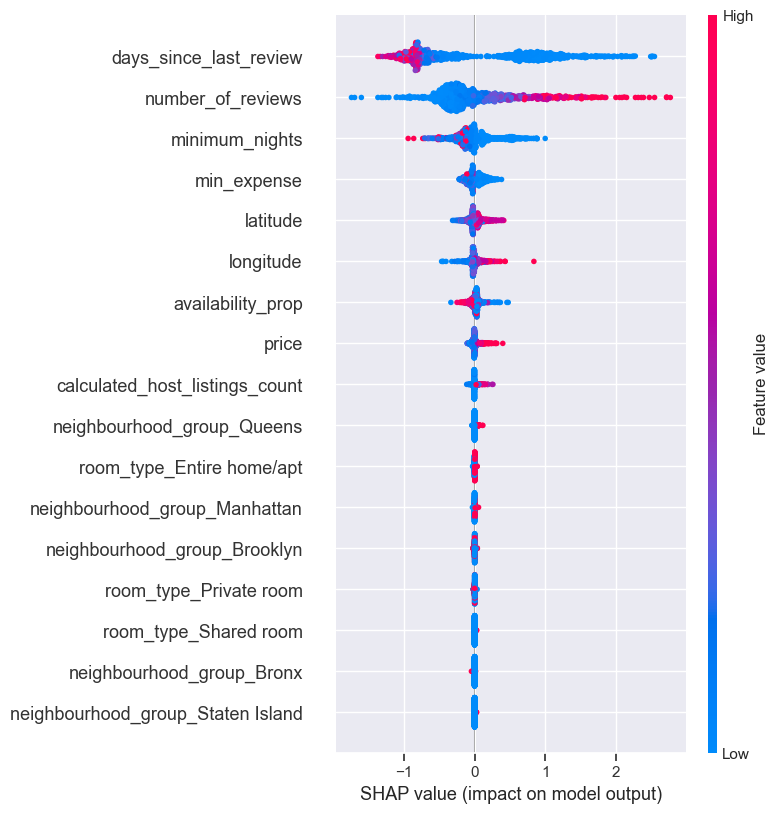

In [41]:
#Summary plot, feature importance
shap.summary_plot(shap_values, X_test_enc)

**Summary**: 
The Beeswarm SHAP plot is used to understand how the individual predictions are influenced by different features and we can observe the variable in feature contributions across our dataset.

For example, in our plot we see:

1) As the value of our days_since_last_review feature DECREASES, its SHAP value becomes more positive and as a results its contributing towards a higher value of reviews_per_month.

2) We see an opposite behaviour for number_of_reviews as compared to days_since_last_review. As the value of this feature INCREASES, its SHAP value becomes more positive and as a results its contributing towards a higher value of reviews_per_month.

3) The length of the bar represents the magnitude of the SHAP value. Longer bars imply a higher impact features. Hence, days_since_last_review and number_of_reviews are higher impact features as compared to price and room_type_Shared room.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

In [42]:
y_pred = pipe_RF.predict(X_test)

In [43]:
r2 = r2_score(y_test, y_pred)
r2

0.6226807358814727

**Summary**: The validation R2 score is 0.582 and the test R2 score is 0.62. Yes, they both agree with each other. An R2 score of 0.582 on the validation set and 0.62 on the test set suggest that the model is capturing a substantial portion of the variance in the data, and the performance is consistent between validation and test sets. This consistency is a positive sign, and it suggests that the model is likely performing well on unseen data.

In [44]:
# Calculate SHAP values
explainer = shap.Explainer(pipe_RF.named_steps['randomforestregressor'])

In [45]:
# Explaining SHAP values for the first row in the test dataset
X_test_enc.iloc[0]

latitude                            -0.79
longitude                           -0.93
price                                0.73
minimum_nights                      -0.19
number_of_reviews                   -0.35
calculated_host_listings_count      -0.16
availability_prop                   -0.89
days_since_last_review              -0.40
min_expense                         -0.02
neighbourhood_group_Bronx            0.00
neighbourhood_group_Brooklyn         1.00
neighbourhood_group_Manhattan        0.00
neighbourhood_group_Queens           0.00
neighbourhood_group_Staten Island    0.00
room_type_Entire home/apt            1.00
room_type_Private room               0.00
room_type_Shared room                0.00
Name: 16415, dtype: float64

In [46]:
print(f"The expected value is", y_test.iloc[0])

The expected value is 0.32


In [47]:
print(f"The predicted value is", y_pred[0])

The predicted value is 0.5346499999999998


In [48]:
shap_values = explainer.shap_values(X_test_enc.iloc[0])  # Replace X_instance with the input data for a specific instance

In [49]:
shap.initjs()

In [50]:
shap.force_plot(explainer.expected_value, shap_values, X_test_enc.iloc[0])

**Summary**: 
1. The raw model score is much smaller than the base value, which is reflected in the prediction.
2. The days_since_last_review, min_expense, number_of_reviews, minimum_nights, latitude all contribute to pushing the prediction to a lower score.
3. While price and availability_prop push the prediction to a higher score.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

In [51]:
df_results = pd.concat(cross_val_results, axis = "columns")
df_results

dummy      ridge      KNN_reg      RandomForest       SVR     
             mean  std  mean  std    mean  std         mean  std mean  std
fit_time     0.00 0.00  0.04 0.02    0.04 0.00        13.52 0.67 1.27 0.02
score_time   0.00 0.00  0.01 0.00    0.13 0.18         0.06 0.01 0.48 0.01
test_score  -0.65 0.08  0.40 0.06    0.36 0.04         0.58 0.03 0.45 0.04
train_score -0.65 0.02  0.41 0.01    0.59 0.01         0.94 0.00 0.48 0.01

In [52]:
print("The test score of Random Forest Regressor is", df_results["RandomForest"]["mean"]["test_score"], "and the metric used to calculate it is R^2 score")

The test score of Random Forest Regressor is 0.58 and the metric used to calculate it is R^2 score


**Conclusions:**
The table above shows the scores of Dummy model, a linear model (ridge), KNN, Random Forest and SVM. Among all the models, Random Forest performs the best on train (0.98) as well as on validation (0.58). From our previous sections, we see that while testing, RF performs slightly better with a score of 0.62.

**Improvements**:
1. Enhanced computational power allows leveraging larger datasets, potentially improving model performance during testing.
2. Deeper data comprehensionallows fors sophisticated feature engineering, refining model input fora  better predictive power.
3. Increased visualization aids in revealing spatial relationships between locations and other features, providing richer insights into the dataset.
4. Reevaluating the target variable's definition and exploring literature on interpreting review data could enhance clarity and model alignment with domain-specific insights.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**

- Convert this notebook into scripts to create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

An important lesson was that we should never judge the power of a feature just because it does not contribute well alone. It may contribute well when combined with another feature. We can never assume the importance of a feature, but must always check with different methods to ensure that it is important.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans: 

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: